<a href="https://colab.research.google.com/github/galievaz/ISAC/blob/master/sentiments_of_tweets_about_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter Sentiment Analysis for COVID-19 tweets

## The project was made by

*   Zarina Galieva (@xgalieva)
*   Fernando Henao Pacheco (@fhenaop)
*   Gloria Abbey (@xabbey)
*   Roman Sadzhenytsia (@xsadzhen)



## Table of contents

* Abstract
* Goal
* Data
  * Loading
  * Preprocessing
* Methodology
  * Dictionary based analysis
  * Instance based learning
  * Textblob
* Discussion
* List of references


## Abstract
Sentiment analysis deals with analyzing or examining the opinions, thoughts and views expressed in a source tex. Twitter is a popular social networking site that allows users to post messages called "tweets". Twitter users are restricted to140 characters per "tweet". Owing to Twitter's prominence, there is a huge amount of source data that can be analyzed using sentiment analysis.

## Goal

The goal of this project is to do sentiment analysis for tweets (determine whether the tweet is positive, negative or neutral) related to the COVID-19 pandemic. It is used the TextBlob library, and polarity results from this library can be compared with both a dictionary-based analysis and a KNN algorithm.

## Data

The dataset has been extracted from https://www.kaggle.com/smid80/coronavirus-covid19-tweets-late-april
This dataset contains 22 columns, as follows:
<table>
<thead>
<tr>
<th>COLUMN</th>
<th>DESCRIPTION</th>
</tr>
</thead>
<tbody><tr>
<td>status_id</td>
<td>The ID of the actual Tweet.</td>
</tr>
<tr>
<td>user_id</td>
<td>The ID of the user account that Tweeted.</td>
</tr>
<tr>
<td>created_at</td>
<td>The date and time of the Tweet.</td>
</tr>
<tr>
<td>screen_name</td>
<td>The screen name of the account that Tweeted.</td>
</tr>
<tr>
<td>text</td>
<td>The text of the Tweet.</td>
</tr>
<tr>
<td>source</td>
<td>The type of app used.</td>
</tr>
<tr>
<td>reply_to_status_id</td>
<td>The ID of the Tweet to which this was a reply.</td>
</tr>
<tr>
<td>reply_to_user_id</td>
<td>The ID of the user to whom this Tweet was a reply.</td>
</tr>
<tr>
<td>reply_to_screen_name</td>
<td>The screen name of the user to whom this Tweet was a reply.</td>
</tr>
<tr>
<td>is_quote</td>
<td>Whether this Tweet is a quote of another Tweet.</td>
</tr>
<tr>
<td>is_retweet</td>
<td>Whether this Tweet is a retweet.</td>
</tr>
<tr>
<td>favourites_count</td>
<td>The number of favourites this Tweet has received.</td>
</tr>
<tr>
<td>retweet_count</td>
<td>The number of times this Tweet has been retweeted.</td>
</tr>
<tr>
<td>country_code</td>
<td>The country code of the account that Tweeted.</td>
</tr>
<tr>
<td>place_full_name</td>
<td>The name of the place of the account that Tweeted.</td>
</tr>
<tr>
<td>place_type</td>
<td>A description of the type of place corresponding with place_full_name.</td>
</tr>
<tr>
<td>followers_count</td>
<td>The number of followers of the account that Tweeted.</td>
</tr>
<tr>
<td>friends_count</td>
<td>The number of friends of the account that Tweeted.</td>
</tr>
<tr>
<td>account_lang</td>
<td>The language of the account that Tweeted.</td>
</tr>
<tr>
<td>account_created_at</td>
<td>The date and time that the account that Tweeted was created.</td>
</tr>
<tr>
<td>verified</td>
<td>Whether the account that Tweeted is verified.</td>
</tr>
<tr>
<td>lang</td>
<td>The language of the Tweet.</td>
</tr>
</tbody></table>

### Loading

The steps we used for the data loading are as follows;
1.	Authentication and creation of the PyDrive client 
2.	Choosing a local (colab) directory to store the data.
3.	Auto-iterate using the query syntax
4.	Load data using the “pd.read_csv” function


In [ ]:
!pip install -U pycld3

     |████████████████████████████████| 13.3MB 29kB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

import cld3
import regex
import regex as re
import nltk.data
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer, TreebankWordTokenizer, word_tokenize
from nltk.util import bigrams
from wordcloud import WordCloud
from textblob import TextBlob

import warnings

warnings.filterwarnings('ignore')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except:
  pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile({
  'q': "'1IaFTSq4LIBz7sRS0rjLarW1I95Itfjo1' in parents"
}).GetList()

# 3. Load data only for the last day and Twitter sentiment data
for i in (-1, -2):
  fname = os.path.join(local_download_path, file_list[i]['title'])

  print('title: %s, id: %s' % (file_list[i]['title'], file_list[i]['id']))
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': file_list[i]['id']})
  f_.GetContentFile(fname)

title: SemEval2015-English-Twitter-Lexicon.txt, id: 1ocAUafVcHm8DKX8622zbqHt6uR0jHF0F
downloading to /root/data/SemEval2015-English-Twitter-Lexicon.txt
title: 2020-04-16 Coronavirus Tweets.CSV, id: 1Dw6gWcsscHhMHK-wXpPA5pC0A-vviFET
downloading to /root/data/2020-04-16 Coronavirus Tweets.CSV


In [ ]:
df = pd.read_csv("/root/data/2020-04-16 Coronavirus Tweets.CSV")[:10000] 
df.head()

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favourites_count,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1250574628726214658,817072420947247104,2020-04-16T00:00:00Z,Tu_IMSS_Coah,"Para complementar la higiene de tus manos, el ...",TweetDeck,NaN,NaN,NaN,False,False,1828,2,NaN,NaN,NaN,1671,169,NaN,2017-01-05T18:17:00Z,False,es
1,1250574627127975938,44728980,2020-04-16T00:00:00Z,ANCALERTS,PWDs from Tahanang Walang Hagdan get aid amid ...,TweetDeck,NaN,NaN,NaN,False,False,5449,1,NaN,NaN,NaN,4915788,775,NaN,2009-06-04T21:26:24Z,True,tl
2,1250574628671467521,1235017593649418241,2020-04-16T00:00:00Z,julycio,#France ได้รับความทุกข์ทรมานจาก # ชุดการแยกตัว...,Twitter for Advertisers,NaN,NaN,NaN,False,False,27,0,NaN,NaN,NaN,43,266,NaN,2020-03-04T01:43:19Z,False,th
3,1250574628575010816,92174767,2020-04-16T00:00:00Z,DZMMTeleRadyo,Target ng Department of Health na magkaroon ng...,TweetDeck,NaN,NaN,NaN,False,False,578,3,NaN,NaN,NaN,1372231,161,NaN,2009-11-24T02:03:16Z,True,tl
4,1250574628201717760,1042498579909107712,2020-04-16T00:00:00Z,ContraReplicaMX,La @SSalud_mx lanzó una nueva convocatoria esp...,TweetDeck,NaN,NaN,NaN,False,False,5743,0,NaN,NaN,NaN,13474,2557,NaN,2018-09-19T19:40:04Z,False,es


In [ ]:
df.describe()

,status_id,user_id,reply_to_status_id,reply_to_user_id,favourites_count,retweet_count,followers_count,friends_count,account_lang
count,1.000000e+04,1.000000e+04,1.282000e+03,1.550000e+03,10000.00000,10000.00000,1.000000e+04,1.000000e+04,0.0
mean,1.250579e+18,3.242098e+17,1.249990e+18,2.338391e+17,12736.47920,3.74000,7.054616e+04,2.507053e+03,NaN
std,2.785757e+12,4.912705e+17,6.712420e+15,4.343449e+17,36236.27277,45.26181,4.619317e+05,1.713132e+04,NaN
min,1.250575e+18,3.840000e+03,1.115750e+18,6.215330e+05,0.00000,0.00000,0.000000e+00,0.000000e+00,NaN
25%,1.250577e+18,1.276234e+08,1.250496e+18,4.987209e+07,279.00000,0.00000,1.740000e+02,1.860000e+02,NaN
50%,1.250579e+18,8.475217e+08,1.250571e+18,2.925746e+08,1898.00000,0.00000,1.076000e+03,6.090000e+02,NaN
75%,1.250582e+18,8.743674e+17,1.250578e+18,3.292061e+09,8970.00000,1.00000,6.824000e+03,1.685250e+03,NaN
max,1.250584e+18,1.250582e+18,1.250584e+18,1.250573e+18,633937.00000,3089.00000,1.262934e+07,1.223351e+06,NaN


In [ ]:
df.count()

status_id               10000
user_id                 10000
created_at              10000
screen_name             10000
text                    10000
source                  10000
reply_to_status_id       1282
reply_to_user_id         1550
reply_to_screen_name     1550
is_quote                10000
is_retweet              10000
favourites_count        10000
retweet_count           10000
country_code              486
place_full_name           486
place_type                486
followers_count         10000
friends_count           10000
account_lang                0
account_created_at      10000
verified                10000
lang                    10000
dtype: int64

### Preprocessing

The aim of the following data preprocessing is to create a **Bag-of-Words** representation of the data. The preprocessing steps is as follows:
1.   Cleansing
*   Remove usernames (mentions)
*   Remove URLs
*   Remove tweets with *Not Available* text
*   Remove special characters
*   Remove numbers
2.   Text processing
*   Tokenization
*   Transform to lowercase
*   Stemming
3.   Build word list for Bag-of-Words

In [ ]:
df.lang = df.text.apply(lambda i: cld3.get_language(i).language)

In [ ]:
indexNames = df[df['lang'] != 'en'].index
df.drop(indexNames, inplace=True)
df.reset_index(inplace=True)
df.lang.head()

0    en
1    en
2    en
3    en
4    en
Name: lang, dtype: object

In [ ]:
tweets_all = df[['user_id', 'screen_name','favourites_count', 
                 'retweet_count', 'created_at',	'text']]
tweets_all.head()

,user_id,screen_name,favourites_count,retweet_count,created_at,text
0,15872418,ABSCBNNews,1075,0,2020-04-16T00:00:00Z,G20 agrees to debt relief for poorest countrie...
1,171548670,RadioNLNews,501,0,2020-04-16T00:00:00Z,B.C. health officials are urging people to kin...
2,23517017,953WDAE,13891,0,2020-04-16T00:00:00Z,The Lovely Lisa Ann Joins The Show LIVE From N...
3,613510703,matanock,327,0,2020-04-16T00:00:00Z,@allisonnamias @ArriolaLR As @ethanbdm referen...
4,38489678,JAMA_current,1357,130,2020-04-16T00:00:00Z,Study suggests higher rates of co-infection be...


In [ ]:
tweets_all.describe()

,user_id,favourites_count,retweet_count
count,4.924000e+03,4924.000000,4924.000000
mean,3.205641e+17,14971.877742,3.501625
std,4.853154e+17,40092.491756,43.100224
min,3.840000e+03,0.000000,0.000000
25%,1.079392e+08,326.250000,0.000000
50%,9.220033e+08,2181.500000,0.000000
75%,8.719640e+17,10781.500000,1.000000
max,1.250578e+18,599171.000000,1619.000000


In [ ]:
def preprocessing(tweets_all):
    url_pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    pic_pattern = re.compile('pic\.twitter\.com/.{10}')
    tweets_all['text'] = tweets_all['text'].apply(lambda buf: url_pattern.sub('',buf))
    tweets_all['text'] = tweets_all['text'].apply(lambda buf: pic_pattern.sub('',buf))

    # removing space in mentions and hashtags
    tweets_all['text'] = tweets_all['text'].apply(lambda buf: buf.replace('@ ', '@'))
    tweets_all['text'] = tweets_all['text'].apply(lambda buf: buf.replace('# ', '#'))
    return tweets_all

In [ ]:
tweets_all = preprocessing(tweets_all)


1. Removing Twitter Handles (@user)

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [ ]:
tweets_all['tidy_tweet'] = np.vectorize(remove_pattern)(
    tweets_all['text'], "@[\w]*"
) 
tweets_all.tidy_tweet.head()

0    G20 agrees to debt relief for poorest countrie...
1    B.C. health officials are urging people to kin...
2    The Lovely Lisa Ann Joins The Show LIVE From N...
3      As  referenced, just saw this op-ed version ...
4    Study suggests higher rates of co-infection be...
Name: tidy_tweet, dtype: object

2. Removing Punctuations, Numbers, and Special Characters

In [ ]:
tweets_all['tidy_tweet'] = tweets_all['tidy_tweet'].str.replace(
    "[^a-z0-9A-Z#]", " "
)
tweets_all.tidy_tweet.head()

0    G20 agrees to debt relief for poorest countrie...
1    B C  health officials are urging people to kin...
2    The Lovely Lisa Ann Joins The Show LIVE From N...
3      As  referenced  just saw this op ed version ...
4    Study suggests higher rates of co infection be...
Name: tidy_tweet, dtype: object

3. Removing Short Words

In [ ]:
tweets_all.tidy_tweet = tweets_all.tidy_tweet.apply(
    lambda x: ' '.join([w for w in x.split() if len(w) > 3])
)
tweets_all.tidy_tweet.head()

0    agrees debt relief poorest countries amid pand...
1    health officials urging people kind jump concl...
2    Lovely Lisa Joins Show LIVE From #NFL #MLB #CO...
3    referenced just this version Ebola lessons #CO...
4    Study suggests higher rates infection between ...
Name: tidy_tweet, dtype: object

In [ ]:
tweets_all['tidy_tweet'] = tweets_all['tidy_tweet'].str \
  .replace(r"http.?://[^\s]+[\s]?", " ") \
  .replace(r"https.?://[^\s]+[\s]?", " ") \
  .replace("@[^\s]+[\s]?", " ")

tweets_all.tidy_tweet.head()

0    agrees debt relief poorest countries amid pand...
1    health officials urging people kind jump concl...
2    Lovely Lisa Joins Show LIVE From #NFL #MLB #CO...
3    referenced just this version Ebola lessons #CO...
4    Study suggests higher rates infection between ...
Name: tidy_tweet, dtype: object

In [ ]:
def remove_special_chars(tweets):  # it unrolls the hashtags to normal words
  for remove in map(lambda r: regex.compile(regex.escape(r)), 
                    [",", ":", "\"", "=", "&", ";", "%", "$",
                     "@", "%", "^", "*", "(", ")", "{", "}",
                     "[", "]", "|", "/", "\\", ">", "<", "-",
                     "!", "?", ".", "'",
                     "--", "---", "#"]):
        tweets.loc[:, "text"].replace(remove, "", inplace=True)
  return tweets

tweets_all = remove_special_chars(tweets_all)
tweets_all.tidy_tweet.head()

0    agrees debt relief poorest countries amid pand...
1    health officials urging people kind jump concl...
2    Lovely Lisa Joins Show LIVE From #NFL #MLB #CO...
3    referenced just this version Ebola lessons #CO...
4    Study suggests higher rates infection between ...
Name: tidy_tweet, dtype: object

4. Text Normalization

In [ ]:
STOP_WORDS = set(stopwords.words('english')) 

In [ ]:
tokenized_tweet = tweets_all['tidy_tweet'].apply(lambda x: x.split(' '))
tokenized_tweet.head()

0    [agrees, debt, relief, poorest, countries, ami...
1    [health, officials, urging, people, kind, jump...
2    [Lovely, Lisa, Joins, Show, LIVE, From, #NFL, ...
3    [referenced, just, this, version, Ebola, lesso...
4    [Study, suggests, higher, rates, infection, be...
Name: tidy_tweet, dtype: object

In [ ]:
stemmer = PorterStemmer()
tweets_all.tidy_tweet = tokenized_tweet.apply(
    lambda x: ' '.join([
        stemmer.stem(i) for i in x if i not in STOP_WORDS
    ]).strip()
)

In [ ]:
tweets_all.tidy_tweet.replace("", float('NaN'), inplace=True)
tweets_all.dropna(subset=["tidy_tweet"], inplace=True)

In [ ]:
tweets_all.describe()

,user_id,favourites_count,retweet_count
count,4.924000e+03,4924.000000,4924.000000
mean,3.205641e+17,14971.877742,3.501625
std,4.853154e+17,40092.491756,43.100224
min,3.840000e+03,0.000000,0.000000
25%,1.079392e+08,326.250000,0.000000
50%,9.220033e+08,2181.500000,0.000000
75%,8.719640e+17,10781.500000,1.000000
max,1.250578e+18,599171.000000,1619.000000


In [ ]:
tweets_all['tidy_tweet'][0]

'agre debt relief poorest countri amid pandem #covid19'

Story Generation and Visualization from Tweets

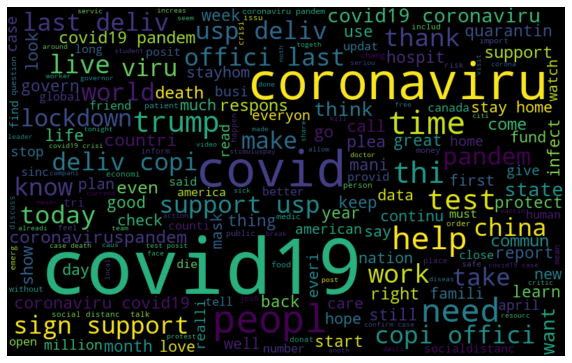

In [ ]:
all_words = ' '.join([text for text in tweets_all['tidy_tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Methodology

The methodology we used for this project is Dictionary-based analysis, Textblob, and KNN. 

Dictionary-based analysis is the method where a specific collection of words of opinion is first compiled manually, then newly discovered words are added to the list. In this method too, manual inspection is required to remove erros. The searching process continues being executed up to the stage when no new words are detected. The main reason we used dictionary based analysis is to compare words in a dictionary to know if a word is positive or negative.

Textblob is a Python module used to measure text sentiment in the production-ready state.

KNN which is an instance-based learning algorithm assumes that similar items are near to each other. In this project, KNN was used to generate predictions using unique instances. 

Additionally we used Precision and Recall as metrics to calculate the prediction's performance. Precision is used as a metric to measure the relevance of the result and Recall is used as a metric to measure how many of the actually important results are returned.

### TextBlob

In [ ]:
sentiment_list = pd.Series([
    TextBlob(tweet).sentiment.polarity
    for tweet in tweets_all.tidy_tweet
], name="Sentiment")
sentiment_list.head()

0    0.000000
1    0.600000
2    0.318182
3    0.000000
4    0.041667
Name: Sentiment, dtype: float64

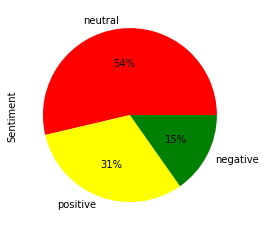

In [ ]:
sentiment_list.apply(
    lambda x: 'positive' if x > 0.05 else 'negative' if x < -0.05 else 'neutral'
).value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

In [ ]:
df = pd.concat([tweets_all['tidy_tweet'], sentiment_list], axis=1)
df.head()

,tidy_tweet,Sentiment
0,agre debt relief poorest countri amid pandem #...,0.000000
1,health offici urg peopl kind jump conclus trav...,0.600000
2,love lisa join show live from #nfl #mlb #covid...,0.318182
3,referenc version ebola lesson #covid19 oeindri...,0.000000
4,studi suggest higher rate infect #sarscov2 res...,0.041667


In [ ]:
sentiment_list.describe()

count    4924.000000
mean        0.056855
std         0.248101
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.136364
max         1.000000
Name: Sentiment, dtype: float64

In [ ]:
sentiment_list_copy_2=sentiment_list.copy()
labels = ["negative", "neutral", "positive"]
label_states = ["predicted", "real"]
conditions = [
    (sentiment_list_copy_2.values > 0.05),
    (sentiment_list_copy_2.values < - 0.05)
]
choices = [1,-1]
sentiment_list_copy_2['label'] = np.select(conditions, choices, default=0)
print(sentiment_list_copy_2)


0                                                        0
1                                                      0.6
2                                                 0.318182
3                                                        0
4                                                0.0416667
                               ...                        
4920                                                     0
4921                                                     0
4922                                                  0.25
4923                                                     0
label    [0, 1, 1, 0, 0, 1, 1, -1, -1, 0, 1, 0, 0, -1, ...
Name: Sentiment, Length: 4925, dtype: object


In [ ]:

positive_words = []
negative_words = []
neutral_words = []

mylist = list(zip(sentiment_list_copy_2['label'], tokenized_tweet))
for feeling, tweet in mylist:
    if feeling == 1:
        for word in tweet:
            positive_words.append(word)
    elif feeling == -1:
        for word in tweet:
            negative_words.append(word)
    elif feeling == 0:
        for word in tweet:
            neutral_words.append(word)

In [ ]:
print(positive_words)

['health', 'officials', 'urging', 'people', 'kind', 'jump', 'conclusions', 'about', 'travellers', 'amid', '#COVID19', 'pandemic', '#Shuswap', '#kamloops', 'Lovely', 'Lisa', 'Joins', 'Show', 'LIVE', 'From', '#NFL', '#MLB', '#COVID19', '#Coronavirus', 'LISTEN', 'Gabriel', 'Leung', 'colleagues', 'from', 'Hong', 'Kong', 'describe', 'their', 'actions', 'after', 'they', 'were', 'first', 'alerted', 'cluster', 'atypical', 'pneumonia', 'cases', 'Wuhan', 'figure', 'shows', 'evolution', 'epidemic', 'responses', 'date', 'Hong', 'Kong', '#COVID19', '#SARSCoV2', 'provided', 'SMSF', 'trustees', 'with', 'course', 'action', 'should', 'fund', 'breach', 'house', 'assets', 'rules', 'COVID', 'driven', 'market', 'downturns', 'Read', 'this', 'article', '#SMSF', '#trustees', '#financialplanning', '#smstrusteenews', '#COVID19', '#COVID', 'While', 'rest', 'world', 'works', 'ensure', 'eventual', 'eradication', '#COVID19', 'Admin', 'uses', 'this', 'public', 'health', 'emergency', 'further', 'their', 'despicable',

In [ ]:
from collections import Counter

pos_dict = dict(Counter(positive_words))
neu_dict = dict(Counter(neutral_words))
neg_dict = dict(Counter(negative_words))

pos_data = list(zip(pos_dict.keys(), pos_dict.values()))
pos_df = pd.DataFrame(pos_data, columns=['Words','Positive'], dtype=int)

neu_data = list(zip(neu_dict.keys(), neu_dict.values()))
neu_df = pd.DataFrame(neu_data, columns=['Words','Neutral'], dtype=int)

neg_data = list(zip(neg_dict.keys(), neg_dict.values()))
neg_df = pd.DataFrame(neg_data, columns=['Words','Negative'], dtype=int)

first_df = pd.merge(pos_df, neu_df, how='outer', on=['Words', 'Words'])
all_df = pd.merge(first_df, neg_df, how='outer', on=['Words', 'Words'])
all_df = all_df.sort_values(by=['Positive', 'Neutral', 'Negative'],
                            ascending=False)
all_df = all_df.set_index('Words')
all_df

,Positive,Neutral,Negative
Words,,,
#COVID19,869.0,1613.0,439.0
this,285.0,349.0,155.0
that,282.0,350.0,148.0
with,255.0,356.0,135.0
#coronavirus,241.0,440.0,110.0
...,...,...,...
Hotels,NaN,NaN,1.0
Billionaire,NaN,NaN,1.0
Nope,NaN,NaN,1.0


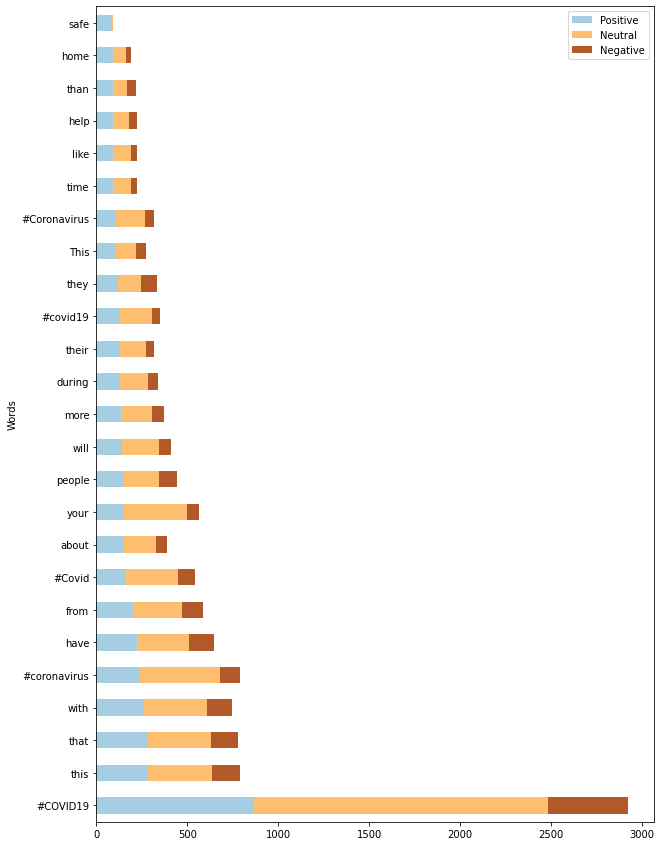

In [ ]:
mydf = all_df[:25]      # we chose to display the first 25 most used words
mydf.plot.barh(figsize=(10,15), colormap='Paired', stacked=True)

### Dictionary-based analysis


In [ ]:
def plot_sentiments(series):
  series.apply(
      lambda x: 'positive' if x > 0.05 else 'negative' if x < -0.05 else 'neutral'
  ).value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

In [ ]:
sentiment_corpus = pd.read_csv("/root/data/SemEval2015-English-Twitter-Lexicon.txt",
                               delimiter="\t", header=None).set_index(1)[0].to_dict()

In [ ]:
def calculate_sentiment(text):
  count = 0
  sum_value = 0

  for phrase in sentiment_corpus:
    if phrase in text:
      sum_value += sentiment_corpus[phrase]
      count += 1
  
  return sum_value / count if count > 0 else 0

In [ ]:
sentiment_list_dict = pd.Series([
  calculate_sentiment(tweet)
  for tweet in tweets_all.tidy_tweet
])

In [ ]:
sentiment_list_dict.head()

0   -0.6040
1    0.0000
2    0.2812
3   -0.2190
4    0.0000
dtype: float64

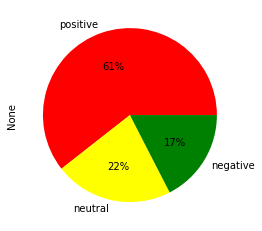

In [ ]:
plot_sentiments(sentiment_list_dict)

In [ ]:
sentiment_list_copy_1=sentiment_list_dict.copy()
labels = ["negative", "neutral", "positive"]
label_states = ["predicted", "real"]
conditions = [
    (sentiment_list_copy_1.values > 0.05),
    (sentiment_list_copy_1.values < - 0.05)
]
choices = [1,-1]
sentiment_list_copy_1['label'] = np.select(conditions, choices, default=0)
print(sentiment_list_copy_1)

0                                                   -0.604
1                                                        0
2                                                   0.2812
3                                                   -0.219
4                                                        0
                               ...                        
4920                                                 0.297
4921                                                 0.109
4922                                                0.0376
4923                                             0.0624444
label    [-1, 0, 1, -1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1...
Length: 4925, dtype: object


### KNN

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer
X = vectorizer.fit_transform(tweets_all['tidy_tweet'])
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
sentiment_list_copy=sentiment_list.copy()

In [ ]:
#sentiment_list_copy['label'] = np.where(sentiment_list_copy.values>0.05, 1)
conditions = [
    (sentiment_list_copy.values > 0.05),
    (sentiment_list_copy.values < - 0.05)
]
choices = [1,-1]
sentiment_list_copy['label'] = np.select(conditions, choices, default=0)
print(sentiment_list_copy)

0                                                        0
1                                                      0.6
2                                                 0.318182
3                                                        0
4                                                0.0416667
                               ...                        
4920                                                     0
4921                                                     0
4922                                                  0.25
4923                                                     0
label    [0, 1, 1, 0, 0, 1, 1, -1, -1, 0, 1, 0, 0, -1, ...
Name: Sentiment, Length: 4925, dtype: object


In [ ]:
XX = X.toarray()
YY = sentiment_list_copy['label']

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(XX, YY, test_size=0.3, random_state=42)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
YYY = knn.predict(X_test)
print(YYY)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, YYY)

0.5419485791610285

### Precision and recall calculation

In [ ]:
from sklearn.metrics import classification_report
print('Results for KNN')
print(classification_report(y_test, YYY, target_names=labels)) #for KNN
print('Results for Dictionary-based analysis')
print(
    classification_report(
        sentiment_list_copy_2['label'],
        sentiment_list_copy_1['label'],
        target_names=labels
    )
)

Results for KNN
              precision    recall  f1-score   support

    negative       0.80      0.02      0.03       251
     neutral       0.54      1.00      0.70       783
    positive       0.89      0.04      0.07       444

    accuracy                           0.54      1478
   macro avg       0.74      0.35      0.27      1478
weighted avg       0.69      0.54      0.40      1478

Results for Dictionary-based analysis
              precision    recall  f1-score   support

    negative       0.27      0.31      0.29       750
     neutral       0.56      0.23      0.32      2643
    positive       0.38      0.74      0.50      1531

    accuracy                           0.40      4924
   macro avg       0.40      0.42      0.37      4924
weighted avg       0.46      0.40      0.37      4924



## Discussion
Dictionary-based analysis and TextBlob results show the same 16% in the negative percentage. However, positive and neutral have different percentages, because the dictionary-based qualify 63% as positive and 21% as neutral, but TextBlob assigned 52% as positive and 32% as neutral.
A possible cause is the dictionary, and the threshold selected to assign tweets as positive, negative or neutral. 

## List of references

File importing from Google Drive to Google Colab by PyDrive - https://buomsoo-kim.github.io/colab/2018/04/16/Importing-files-from-Google-Drive-in-Google-Colab.md/

NRC Hashtag Sentiment Lexicon - http://sentiment.nrc.ca/lexicons-for-research/

TextBlob Sentiment: Calculating Polarity and Subjectivity - https://planspace.org/20150607-textblob_sentiment/

D. S. Rajput, R.S. Thakur, S. M. Basha, “Sentiment Analysis and Knowledge Discovery in Contemporary Business”, IGI Global, 2019

TextBlob: Simplified Text Processing - https://github.com/sloria/textblob